# Iris Project - Supplementary Notebook
24-25: 4122 -- PROGRAMMING AND SCRIPTING : Project

The objective of this jupyter notebook is to use the analysis.py module and show some of the functionality of the analysis.py module as well as commnent on the iris dataset.

Some of the functions in the analysis.py module which are called in this notebook have a parameter which defines if the function will write a file or run show plots. The default behaiviour is to write to file but there is a write to console options , which writes or shows to the console or in this case the jupyter notebook.


## Requirements


1. Research the data set online and write a summary about it in your README.
2. Download the data set and add it to your repository.
3. Write a program called analysis.py that:
    1. Outputs a summary of each variable to a single text file,
    2. Saves a histogram of each variable to png files, and
    3. Outputs a scatter plot of each pair of variables.
    4. Performs any other analysis you think is appropriate.

## References

- Github Copilot. (n.d.). *GitHub Copilot*.  This is a code completion tool that uses machine learning to suggest code snippets and functions based on the context

*Note: The code for functions will be associated with functions in analysis.py module will be shown as well , using the describe function*


### Import some standard libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inspect

### Import python module analysis.py 

This follows the DRY principle (Don't Repeat Yourself) and allows the easy testing of the code in the analysis.py module. This also means that code is not repeated in the notebook

In [22]:
import analysis as an

### Load Iris Data Set

In [23]:
# load iris data set and check return code
# return code 0 means success
return_code, df_iris = an.load_data(an.config)
if return_code != 0:
    print(f"Error loading data : {return_code}")
else:
    print("Data loaded successfully")

Data loaded successfully


**Code**

In [24]:
print(inspect.getsource(an.load_data))

def load_data(config):
    """
    Load data from a CSV file into a pandas DataFrame.
    Args:
        config (dict): Configuration dictionary containing the following keys:
            - source_csv_file (str): Path to the source CSV file.
            - source_columns (list): List of column names for the DataFrame.
    Returns:
        tuple: A tuple containing:
            - return_code (int): 0 if successful, 1 if failure.
            - df (pandas.DataFrame or None): Loaded DataFrame if successful, None if failure.
    Raises:
        Exception: If there is an error parsing the file.
    """
    logging.info("Loading data from dir <%s> file <%s>", config['source_path'],config["source_csv_file"])
    # Load data from a CSV file into a pandas DataFrame

    # return_code: 0 = success, 1 = failure
    # df: pandas DataFrame , set to None if return_code is 1
    if "source_csv_file" not in config:
        logging.error("source_csv_file not in config")
        return 1, None
    # Check 

### Convert Iris Data Frame to Metric Data Frame

The data frame is melted so that it is a feature per row. This is helpful when summarising the data

Converts from a format 

| sepal_length | sepal_width | petal_length | petal_width | species |
|--------------|-------------|--------------|-------------|---------|
| 5.1          | 3.5         | 1.4          | 0.2         | setosa  |
| 4.9          | 3.0         | 1.4          | 0.2         | setosa  |

To a metric data frame
| feature       | value | species |
|--------------|-------|---------|
| sepal_length | 5.1   | setosa  |
| sepal_length | 4.9   | setosa  |
| sepal_width  | 3.5   | setosa  |
| sepal_width  | 3.0   | setosa  |



In [25]:
# convert to a metric dataframe
return_code = an.convert_to_metrics_df(an.config)
if return_code != 0:
    print(f"Error converting data to metrics dataframe : {return_code}")
else:
    print("Data converted to metrics dataframe successfully")
print('Melted data frame head:')
an.config['df_iris_melt'].head()

Data converted to metrics dataframe successfully
Melted data frame head:


,species,feature,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0


**Code**

In [26]:
print(inspect.getsource(an.convert_to_metrics_df))

def convert_to_metrics_df(config):
    """
    Converts a DataFrame to a metric DataFrame using the melt function.

    This function transforms the input DataFrame into a long format, which is useful for certain types of plots
    and statistical analysis. The resulting DataFrame will have columns for species, feature, and value.

    Args:
        config (dict): A configuration dictionary containing the input DataFrame under the key 'df'.

    Returns:
        int: Returns 0 if the conversion is successful, or 1 if the resulting DataFrame is empty.

    Raises:
        KeyError: If the 'df' key is not present in the config dictionary.

    Example:
        config = {'df': iris_df}
        result = convert_to_metrics_df(config)
    """
    # This will convert to a metric dataframe
    # using melt , this is useful for certain types of plots
    # in the datacamp course - I am familiar with the metrics tables
    # from Lloyds Bank and implememnted in primark for SKU/Store/Date
    # u

### Load Summary Data Set

This converts the iris melted data from to a summary data frame. This contains Mean,Max,Min,Std Dev,Median , Q25 , Q75 for each species and each feature

In [27]:
# create a summary dataframe
return_code = an.load_summary(an.config)
if return_code != 0:
    print(f"Error creating summary dataframe : {return_code}")
else:
    print("Summary dataframe created successfully")

an.config['df_summary'].head()

Summary dataframe created successfully


,species,feature,Mean,Min,Max,Std,Median,Q25,Q75
0,Iris-setosa,petal_length,1.46,1.0,1.9,0.17,1.50,1.40,1.58
1,Iris-setosa,petal_width,0.24,0.1,0.6,0.11,0.20,0.20,0.30
2,Iris-setosa,sepal_length,5.01,4.3,5.8,0.35,5.00,4.80,5.20
3,Iris-setosa,sepal_width,3.42,2.3,4.4,0.38,3.40,3.12,3.68
4,Iris-versicolor,petal_length,4.26,3.0,5.1,0.47,4.35,4.00,4.60


**Code**

In [28]:
print(inspect.getsource(an.load_summary))

def load_summary(config):
    """
    Generates a summary DataFrame with statistical measures for each species and feature in the provided DataFrame.
    Args:
        config (dict): A configuration dictionary that must contain the key 'df_iris_melt', which is a DataFrame with columns 'species', 'feature', and 'value'.
    Returns:
        int: Returns 0 if the summary DataFrame is successfully created and added to the config dictionary under the key 'df_summary'.
             Returns -1 if the 'df_iris_melt' DataFrame is not found in the config dictionary.
             Returns 1 if the resulting summary DataFrame is empty.
    The summary DataFrame includes the following statistical measures for each species and feature:
        - Mean
        - Min
        - Max
        - Std (Standard Deviation)
        - Median
        - Q25 (25th Quantile)
        - Q75 (75th Quantile)
    The resulting summary DataFrame is rounded to 2 decimal places for all statistical measures.
    Logs:
      

## Run generate report 

This will display the report in the notebook and also save it to a file.


In [29]:
return_code = an.generate_report(an.config, to_console=True)
if return_code != 0:
    print(f"Error generating report : {return_code}")
else:
    print("Report generated successfully")

Analysis Report
DataFrame
DataFrame Shape: (150, 5)
DataFrame Info: <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x

**Code**

In [30]:
print(inspect.getsource(an.generate_report))

def generate_report(config,to_console = False):
    """
    Generates an analysis report from a given configuration and writes it to a file.

    Parameters:
    config (dict): A dictionary containing configuration settings. Must include:
        - "target_report" (str): The file path where the report will be saved.
        - "df" (pandas.DataFrame): The DataFrame to be analyzed and reported.
    to_console (bool, optional): If True, prints the report to the console. Default is False.

    Returns:
    int: Returns 0 on success, -1 if the DataFrame is not found in the config.

    Raises:
    OSError: If there is an issue removing the existing report file.
    """
    logging.info("Generating report")
    # setup a report file name
    report_file = f"{config['target_path']}/{config["target_report"]}"
    # check if the report file exists
    if os.path.exists(report_file):
        # remove the file
        os.remove(report_file)
    # open the file for writing
    if 'df' not in confi

## Plot histogram of the data
This will display the histogram in the notebook and also save it to a file using generate_histogram function in the analysis.py module

The histograms show that the there is distinct diffirence between iris setosa and the other two species ( versicolor and virginica) with respect to petal length and petal width.  The sepal length and width do not show an obvious difference between the three species. 

*Note: There is an alternative histogram function which saves each histogram as a separate file.*

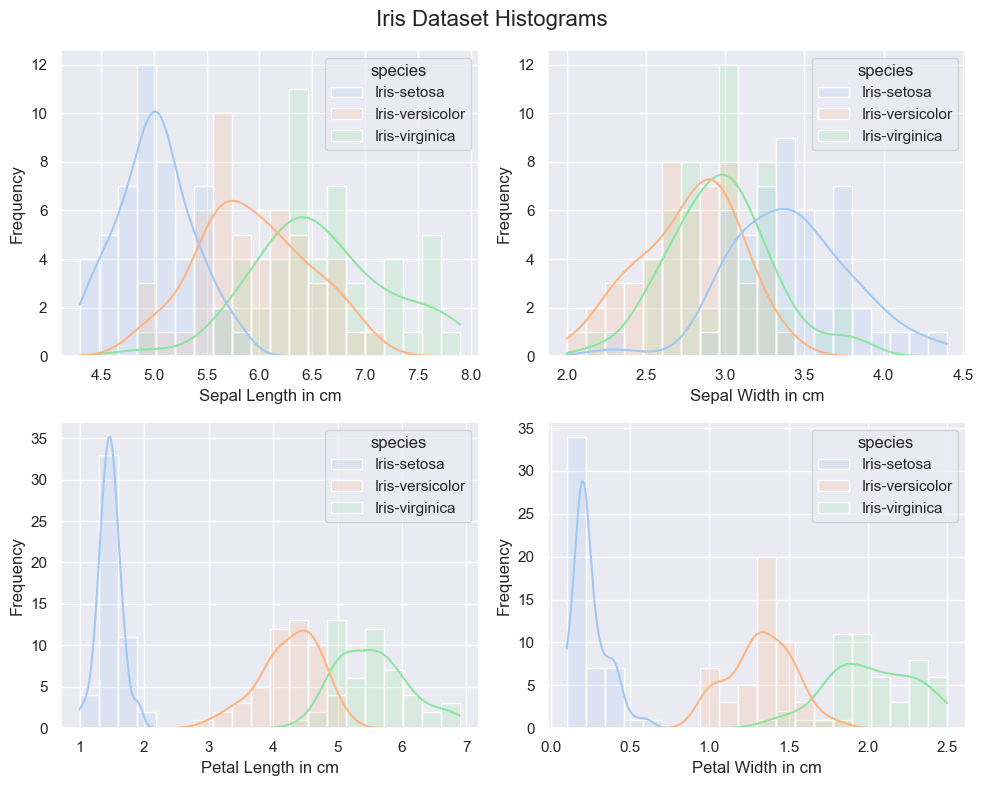

0

In [31]:
an.generate_histograms_combined(an.config, to_console=True)

**Code**

In [32]:
print(inspect.getsource(an.generate_histograms_combined))

def generate_histograms_combined(config,to_console = False):
    """
    Generate a histogram of the Iris dataset.
    Parameters:
    config (dict): Configuration dictionary containing the following keys:
        - 'df' (pandas.DataFrame): DataFrame containing the Iris dataset.
        - 'target_histogram_combined' (str): File path where the histogram will be saved.
    to_console (bool, optional): If True, display the histogram in the console. Default is False.
    Returns:
    int: Returns 0 if the histogram is generated successfully, -1 if the DataFrame is not found in the config.
    Raises:
    FileNotFoundError: If the target histogram file path is invalid.
    Notes:
    - The function creates a subplot with 2 rows and 2 columns to hold the histograms of sepal length, sepal width, petal length, and petal width.
    - The histograms are colored by species and include a kernel density estimate (KDE).
    - If the target histogram file already exists, it will be removed before sav

## Plot Scatterplot of the data
This will display the scatterplot in the notebook and also save it to a file.
of the code. 

There is a distinct relationship between petal length and petal width , as well as the species. This may imply that only one of the features needs to be used , or possible the width and length of the petal can be comined ( approximate servace area , either assume a rectangle or ellipse) to create a new feature. The formulae for a elipse is pi * a * b where a and b are the semi major and minor axes. The formulae for a rectangle is a * b (https://www.cuemath.com/geometry/area-of-an-ellipse/) and alternative is the circumference of a circle ( pi * sqrt(2[a**2+b**2]) (https://www.cuemath.com/measurement/perimeter-of-ellipse/)

References:
- [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) 

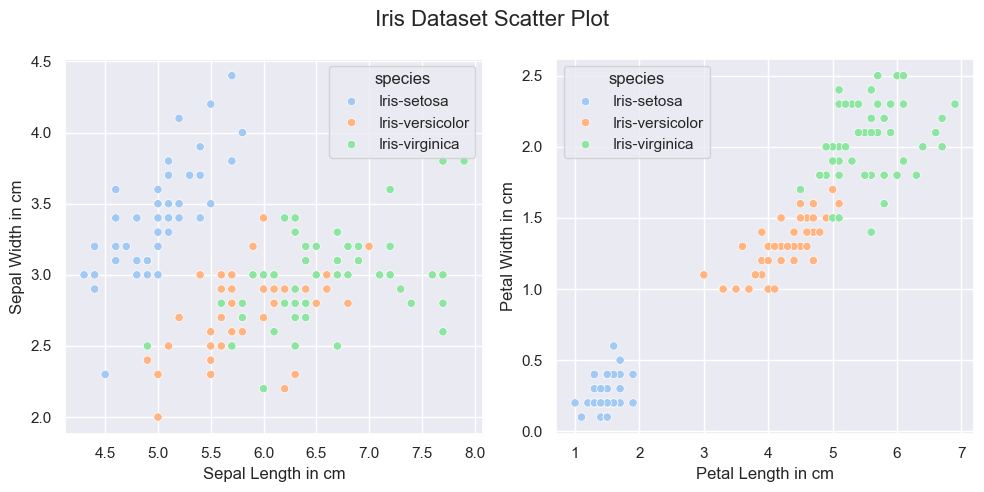

0

In [33]:
an.generate_scatter_plot(an.config, to_console=True)

In [34]:
# print the source code of the generate_scatter_plot function
lines = inspect.getsource(an.generate_scatter_plot)
print(lines)

def generate_scatter_plot(config,to_console = False):
    """
    Generates a scatter plot of the Iris dataset based on the provided configuration.

    Parameters:
    config (dict): A dictionary containing the configuration for the plot. 
                   It must include the following keys:
                   - 'df': A pandas DataFrame containing the Iris dataset.
                   - 'target_scatter': The file path where the scatter plot will be saved.
    to_console (bool): If True, the scatter plot will be displayed in the console. 
                       Default is False.

    Returns:
    int: Returns 0 if the scatter plot is generated successfully, 
         -1 if the DataFrame is not found in the config.

    Raises:
    FileNotFoundError: If the target scatter plot file path is invalid.
    """
    logging.info("Generating scatter plot")
    # Generate a scatter plot of the data
    # check if the dataframe is empty
    filename = f"{config['target_path']}/{config['target_s

## Plot Box plot of the data
This will display the boxplot in the notebook and also save it to a file.

The box plot shows the summary metrics in a diagram , so that the data can be easily visualised. The box plot shows the median, Q25 and Q75 as the box , and the whiskers shows a line at IQR * 1.5 above and below the box. Anything outside ( above and below ) is considered an outlier. 

What is interesting is the seperation between the species. In the sepal's there is more overlap than the petal's length and width. 

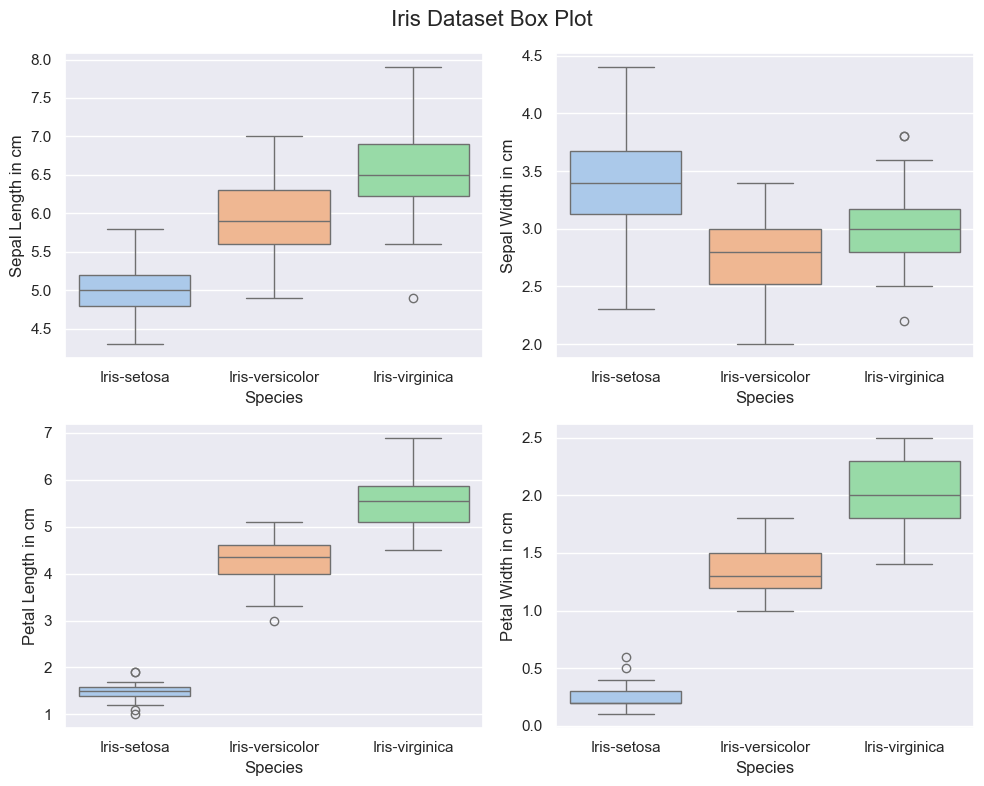

0

In [35]:
an.generate_box_plot(an.config, to_console=True)

**Code**

In [36]:
print(inspect.getsource(an.generate_box_plot))

def generate_box_plot(config,to_console = False):
    """
    Generates a box plot for the Iris dataset and saves it to a file.
    Parameters:
    config (dict): Configuration dictionary containing:
        - 'df' (pandas.DataFrame): DataFrame containing the Iris dataset.
        - 'target_box' (str): File path where the box plot image will be saved.
    to_console (bool, optional): If True, displays the box plot in the console. Defaults to False.
    Returns:
    int: Returns 0 if the box plot is generated successfully, -1 if the DataFrame is not found in the config.
    Raises:
    FileNotFoundError: If the target box plot file path does not exist.
    """
    # Generate a box plot of the data
    logging.info("Generating box plot")
    # check if the dataframe is empty
    if 'df' not in config:
        logging.error("DataFrame not in config")
        return -1
    # check if the box plot file exists
    filename = f"{config['target_path']}/{config['target_box']}"
    if os.path.ex

## Box Plot of iris data set - Common X axis
This will display the boxplot in the notebook and also save it to a file.
This is a box plot , similar to the above for each species of iris and feature with a common x axis . This makes it easier to proportianly compare the species and features.

The species setosa stands out as distinct from the other two species , with respect to the petal length and petal width , there is also seperation for the other two species but it is less distinct . There is cross over between the two species , especially with respect to outliers.

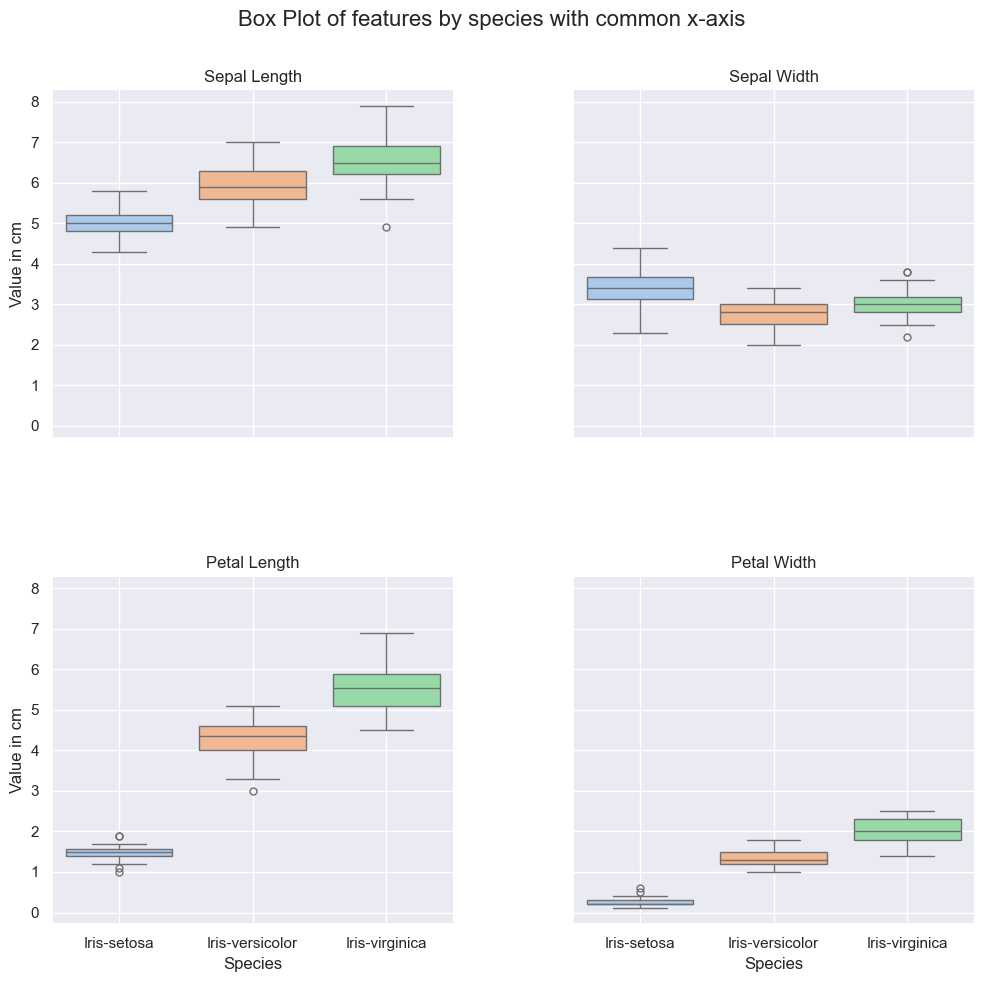

Box plot I generated successfully


In [37]:
return_code = an.generate_box_plot_II(an.config, to_console=True)
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")


*Code*

In [38]:
print(inspect.getsource(an.generate_box_plot_II))

def generate_box_plot_II(config, to_console = False, kind = "box"):
    """
    Generate a box plot (or other specified kind of plot) of the data.
    Parameters:
    config (dict): Configuration dictionary containing the following keys:
        - 'df': DataFrame to be plotted.
        - 'df_iris_melt': Melted DataFrame for plotting.
        - 'target2_box': File path for saving the box plot.
        - 'target2_boxen': File path for saving the boxen plot.
        - 'target2_violin': File path for saving the violin plot.
    to_console (bool): If True, display the plot to the console. Default is False.
    kind (str): Type of plot to generate. Options are 'box', 'boxen', or 'violin'. Default is 'box'.
    Returns:
    int: 0 if the plot is generated successfully, -1 if there is an error.
    """
    # Generate a box plot of the data
    # check if the dataframe is empty
    file_lookup = {
        "box": config["target2_box"],
        "boxen": config["target2_boxen"],
        "violin": 

## Violin Plot of iris data set - Common X axis
This will display the violin plot in the notebook and also save it to a file.  


A violin plot plays a similar role as a box-and-whisker plot. It shows the distribution of data points after grouping by one (or more) variables. Unlike a box plot, each violin is drawn using a kernel density estimate of the underlying distribution. The width of the violin indicates the "density" of the points at different values. The fatter the more points are there .

- https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
- Google Gemini - What is a violin Plot


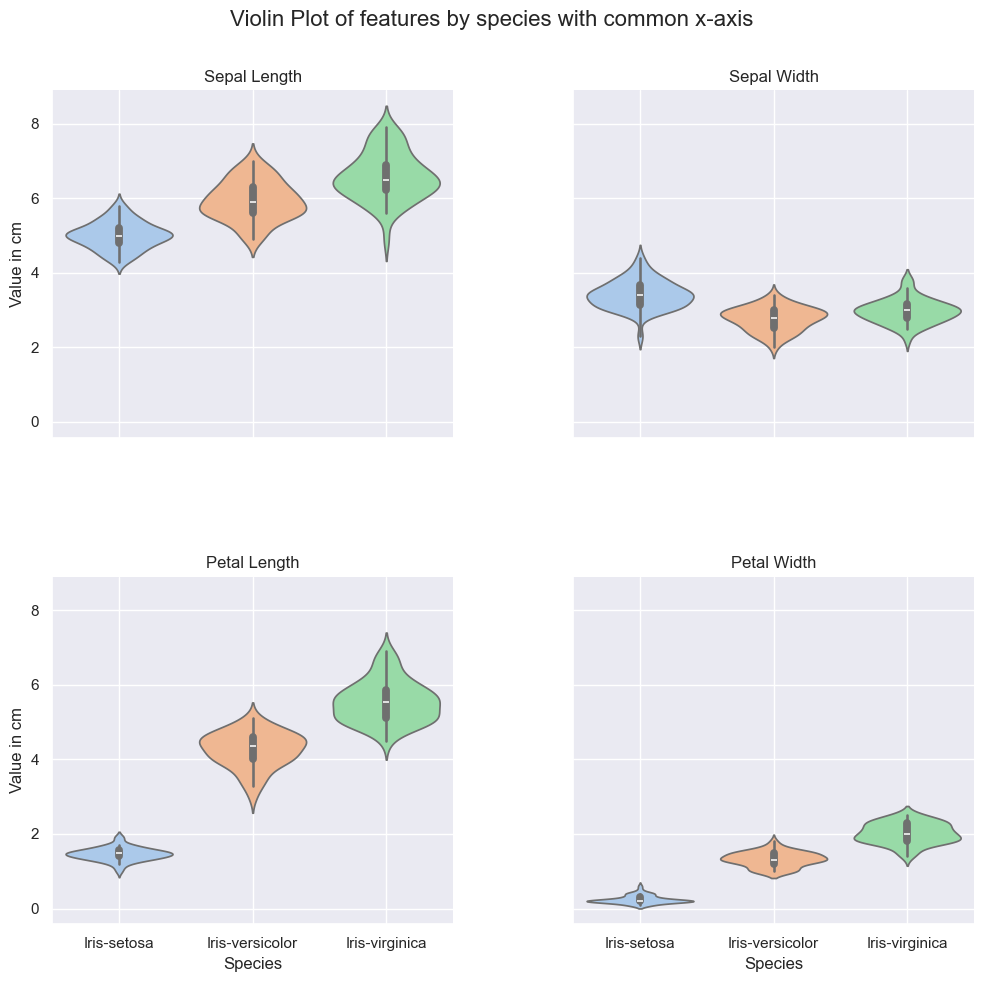

Box plot I generated successfully


In [39]:
return_code = an.generate_box_plot_II(an.config, to_console=True,kind='violin')
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")


## Boxen Plot of iris data set - Common X axis
This will display the boxen plot in the notebook and also save it to a file.
This is a boxen plot , similar to the above for each species of iris and feature with a common x axis . This makes it easier to proportianly compare the species and features.

The boxen plot shows more quantiles and the tails. Shows the outliers in more detail. It is supposed to be for large data sets. The iris data set may be too small for this plot to be useful.  

It does show that generally there is separation between the species for the petal length and width. The outliers show there is overlap between species. The outliers are potentially identified as different species if some catagosing alogorithm was used.

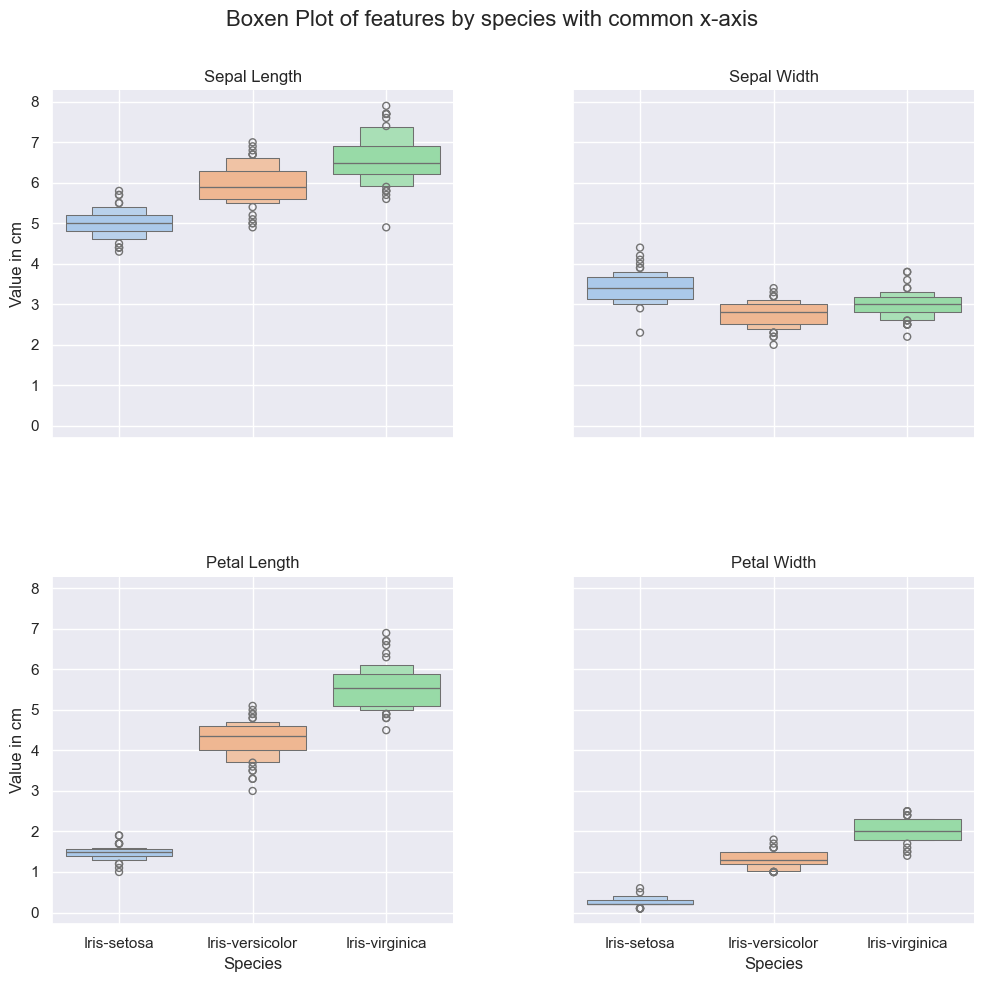

Box plot I generated successfully


In [40]:
return_code = an.generate_box_plot_II(an.config, to_console=True,kind='boxen')
if return_code != 0:
    print(f"Error generating box plot I : {return_code}")
else:
    print("Box plot I generated successfully")